# Fundos otimizados


#Importando os pacotes

In [ ]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 9.6 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting un

#importando dados

In [ ]:
data = yf.download('AGRI11.SA BBOV11.SA BBOI11.SA CORN11.SA BBSD11.SA BMMT11.SA BREW11.SA BDEF11.SA IBOB11.SA ESGB11.SA SPXB11.SA GENB11.SA SMAB11.SA CMDB11.SA XBOV11.SA CRPT11.SA BOVB11.SA TRIG11.SA META11.SA DEFI11.SA BITH11.SA HASH11.SA ETHE11.SA WEB311.SA TECB11.SA GURU11.SA PEVC11.SA 5GTK11.SA JOGO11.SA FOOD11.SA ALUG11.SA USTK11.SA SVAL11.SA WRLD11.SA BDOM11.SA BXPO11.SA SCVB11.SA BTEK11.SA BLOK11.SA NFTS11.SA SMAL11.SA BOVA11.SA BRAX11.SA ECOO11.SA IVVB11.SA BITI11.SA BOVV11.SA DIVO11.SA FIND11.SA GOVE11.SA MATB11.SA ISUS11.SA HTEK11.SA DNAI11.SA MILL11.SA TECK11.SA  PIBB11.SA REVE11.SA YDRO11.SA SHOT11.SA SPXI11.SA SMAC11.SA BCIC11.SA QDFI11.SA QBTC11.SA QETH11.SA ELAS11.SA BOVS11.SA USAL11.SA URET11.SA BOVX11.SA XFIX11.SA GOLD11.SA ACWI11.SA ASIA11.SA XINA11.SA ESGD11.SA  ESGE11.SA EURP11.SA UTEC11.SA ESGU11.SA NASD11.SA XMAL11.SA',start="2020-03-18", end="2023-02-28")
acoes=data['Adj Close']
acoes.tail()


[*********************100%***********************]  83 of 83 completed

61 Failed downloads:
- EURP11.SA: Period 'max' is invalid, must be one of ['1d', '5d']
- ELAS11.SA: Period 'max' is invalid, must be one of ['1d', '5d']
- URET11.SA: Period 'max' is invalid, must be one of ['1d', '5d']
- ESGU11.SA: Period 'max' is invalid, must be one of ['1d', '5d']
- WRLD11.SA: Period 'max' is invalid, must be one of ['1d', '5d']
- ASIA11.SA: Period 'max' is invalid, must be one of ['1d', '5d']
- GENB11.SA: Period 'max' is invalid, must be one of ['1d', '5d']
- CORN11.SA: Period 'max' is invalid, must be one of ['1d', '5d']
- FOOD11.SA: Period 'max' is invalid, must be one of ['1d', '5d']
- PEVC11.SA: Period 'max' is invalid, must be one of ['1d', '5d']
- BMMT11.SA: Period 'max' is invalid, must be one of ['1d', '5d']
- HTEK11.SA: Period 'max' is invalid, must be one of ['1d', '5d']
- USAL11.SA: Period 'max' is invalid, must be one of ['1d', '5d']
- BREW11.SA: Period 'max' is invalid, must be one

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,ASIA11.SA,BBOI11.SA,BBOV11.SA,BBSD11.SA,BCIC11.SA,BDEF11.SA,...,USAL11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,XMAL11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-17 00:00:00,NaN,9.62,NaN,NaN,NaN,NaN,NaN,88.730003,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,107.250000,9.88,6.42,NaN,NaN
2023-02-22 00:00:00,NaN,9.41,NaN,NaN,NaN,NaN,NaN,86.980003,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,105.290001,9.95,6.32,NaN,NaN
2023-02-23 00:00:00,NaN,9.41,NaN,NaN,NaN,NaN,NaN,87.110001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,105.720001,9.95,6.25,NaN,NaN
2023-02-24 00:00:00,NaN,9.41,NaN,NaN,NaN,NaN,NaN,86.099998,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,103.699997,9.91,6.15,NaN,NaN
2023-02-27 00:00:00,NaN,9.49,NaN,NaN,NaN,NaN,NaN,86.250000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,103.910004,9.92,6.24,NaN,NaN


In [ ]:
#acoes.drop(['BLMG11.SA', 'PLOG11.SA', 'RBLG11.SA', 'SNLG11.SA'], axis=1, inplace=True)

In [ ]:
acoes

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,ASIA11.SA,BBOI11.SA,BBOV11.SA,BBSD11.SA,BCIC11.SA,BDEF11.SA,...,USAL11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,XMAL11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,66.099998,NaN,NaN,NaN,NaN
2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.509998,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,67.459999,NaN,NaN,NaN,NaN
2020-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.169998,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,66.070000,NaN,NaN,NaN,NaN
2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.680000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,62.810001,NaN,NaN,NaN,NaN
2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.119999,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,68.760002,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17,NaN,9.62,NaN,NaN,NaN,NaN,NaN,88.730003,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,107.250000,9.88,6.42,NaN,NaN
2023-02-22,NaN,9.41,NaN,NaN,NaN,NaN,NaN,86.980003,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,105.290001,9.95,6.32,NaN,NaN
2023-02-23,NaN,9.41,NaN,NaN,NaN,NaN,NaN,87.110001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,105.720001,9.95,6.25,NaN,NaN


In [ ]:
#data2 = yf.download('BLMG11.SA PLOG11.SA RBLG11.SA SNLG11.SA',start="2021-02-28", end="2022-02-28")
#acoes2=data2['Close']
#acoes2.tail()

In [ ]:
#GetFacebookInformation = yf.Ticker("FB")

# display Company Sector
#print("Company Sector : ", GetFacebookInformation.info['sector'])

# display Price Earnings Ratio
#print("Price Earnings Ratio : ", GetFacebookInformation.info['trailingPE'])

# display Company Beta
#print(" Company Beta : ", GetFacebookInformation.info['beta'])

In [ ]:
# importar tudo
#for key, value in GetFacebookInformation.info.items():
 #   print(key, ":", value)

In [ ]:
# Let us  get historical stock prices for Facebook
# covering the past few years.
# max->maximum number of daily prices available
# for Facebook.
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,
# 5y, 10y and ytd.
#GetFacebookInformation = yf.Ticker("FB")
#print(GetFacebookInformation.history(period="max"))

In [ ]:
#print(GetFacebookInformation.history(period="6mo"))

In [ ]:
#import yfinance as yahooFinance

# in order to specify start date and
# end date we need datetime package
#import datetime

# startDate , as per our convenience we can modify
#startDate = datetime.datetime(2019, 5, 31)

# endDate , as per our convenience we can modify
#endDate = datetime.datetime(2021, 1, 30)
#GetFacebookInformation = yahooFinance.Ticker("FB")

# pass the parameters as the taken dates for start and end
#print(GetFacebookInformation.history(start=startDate,
                                    # end=endDate))

Fundos escolhidos xxxxx . O período foi de 01/01/2021 a 28/02/2023.

Vejamos os Detalhes

In [ ]:
#Limpando a tabela

In [ ]:
acoes=acoes.dropna(axis=1)

In [ ]:
acoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 2020-03-18 00:00:00 to 2023-02-27 00:00:00
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBSD11.SA  732 non-null    float64
 1   BOVA11.SA  732 non-null    float64
 2   BOVV11.SA  732 non-null    float64
 3   BRAX11.SA  732 non-null    float64
 4   DIVO11.SA  732 non-null    float64
 5   ECOO11.SA  732 non-null    float64
 6   FIND11.SA  732 non-null    float64
 7   ISUS11.SA  732 non-null    float64
 8   IVVB11.SA  732 non-null    float64
 9   MATB11.SA  732 non-null    float64
 10  PIBB11.SA  732 non-null    float64
 11  SMAC11.SA  732 non-null    float64
 12  SMAL11.SA  732 non-null    float64
 13  SPXI11.SA  732 non-null    float64
 14  XBOV11.SA  732 non-null    float64
dtypes: float64(15)
memory usage: 91.5+ KB


In [ ]:
#exportar para excell
acoes.to_csv("acoes.csv")

In [ ]:
acoes

,BBSD11.SA,BOVA11.SA,BOVV11.SA,BRAX11.SA,DIVO11.SA,ECOO11.SA,FIND11.SA,ISUS11.SA,IVVB11.SA,MATB11.SA,PIBB11.SA,SMAC11.SA,SMAL11.SA,SPXI11.SA,XBOV11.SA
Date,,,,,,,,,,,,,,,
2020-03-18,63.000000,65.010002,67.300003,56.000000,46.700001,70.989998,77.000000,29.120001,133.500000,21.549999,111.349998,37.599998,72.800003,130.429993,66.099998
2020-03-19,61.509998,65.000000,68.699997,57.910000,46.650002,73.809998,75.000000,25.780001,131.250000,21.680000,113.410004,39.400002,75.989998,128.399994,67.459999
2020-03-20,60.169998,64.769997,67.440002,55.750000,45.160000,73.660004,72.199997,26.900000,125.000000,21.549999,111.000000,39.290001,75.900002,121.349998,66.070000
2020-03-23,55.680000,61.139999,63.820000,52.099998,42.830002,73.660004,67.000000,24.500000,124.000000,20.580000,105.389999,36.980000,71.800003,120.099998,62.810001
2020-03-24,59.119999,67.400002,70.199997,58.400002,44.500000,75.559998,76.449997,26.549999,135.000000,21.820000,116.199997,39.750000,75.949997,129.919998,68.760002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17,88.730003,105.559998,110.320000,91.690002,73.250000,89.050003,99.550003,30.700001,233.000000,56.779999,191.509995,48.900002,92.800003,225.899994,107.250000
2023-02-22,86.980003,103.599998,108.279999,89.739998,71.849998,87.260002,98.000000,30.150000,228.000000,55.849998,188.000000,47.700001,91.000000,221.000000,105.290001
2023-02-23,87.110001,104.150002,108.720001,90.010002,72.089996,87.480003,97.839996,30.139999,228.000000,56.220001,189.199997,47.950001,90.800003,220.880005,105.720001


In [ ]:
#escolher o index
fundos=acoes


In [ ]:
fundos

,BBSD11.SA,BOVA11.SA,BOVV11.SA,BRAX11.SA,DIVO11.SA,ECOO11.SA,FIND11.SA,ISUS11.SA,IVVB11.SA,MATB11.SA,PIBB11.SA,SMAC11.SA,SMAL11.SA,SPXI11.SA,XBOV11.SA
Date,,,,,,,,,,,,,,,
2020-03-18,63.000000,65.010002,67.300003,56.000000,46.700001,70.989998,77.000000,29.120001,133.500000,21.549999,111.349998,37.599998,72.800003,130.429993,66.099998
2020-03-19,61.509998,65.000000,68.699997,57.910000,46.650002,73.809998,75.000000,25.780001,131.250000,21.680000,113.410004,39.400002,75.989998,128.399994,67.459999
2020-03-20,60.169998,64.769997,67.440002,55.750000,45.160000,73.660004,72.199997,26.900000,125.000000,21.549999,111.000000,39.290001,75.900002,121.349998,66.070000
2020-03-23,55.680000,61.139999,63.820000,52.099998,42.830002,73.660004,67.000000,24.500000,124.000000,20.580000,105.389999,36.980000,71.800003,120.099998,62.810001
2020-03-24,59.119999,67.400002,70.199997,58.400002,44.500000,75.559998,76.449997,26.549999,135.000000,21.820000,116.199997,39.750000,75.949997,129.919998,68.760002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17,88.730003,105.559998,110.320000,91.690002,73.250000,89.050003,99.550003,30.700001,233.000000,56.779999,191.509995,48.900002,92.800003,225.899994,107.250000
2023-02-22,86.980003,103.599998,108.279999,89.739998,71.849998,87.260002,98.000000,30.150000,228.000000,55.849998,188.000000,47.700001,91.000000,221.000000,105.290001
2023-02-23,87.110001,104.150002,108.720001,90.010002,72.089996,87.480003,97.839996,30.139999,228.000000,56.220001,189.199997,47.950001,90.800003,220.880005,105.720001


In [ ]:
#fundos.set_index('Date',inplace = True)

In [ ]:
dataset_normalizado = fundos.copy()

for i in fundos.columns:
  dataset_normalizado[i] = fundos[i] / fundos[i][0]

dataset_taxa_retorno = (dataset_normalizado / dataset_normalizado.shift(1)) - 1
dataset_taxa_retorno.fillna(0, inplace=True)
dataset_taxa_retorno

,BBSD11.SA,BOVA11.SA,BOVV11.SA,BRAX11.SA,DIVO11.SA,ECOO11.SA,FIND11.SA,ISUS11.SA,IVVB11.SA,MATB11.SA,PIBB11.SA,SMAC11.SA,SMAL11.SA,SPXI11.SA,XBOV11.SA
Date,,,,,,,,,,,,,,,
2020-03-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-19,-0.023651,-0.000154,0.020802,0.034107,-0.001071,0.039724,-0.025974,-0.114698,-0.016854,0.006033,0.018500,0.047872,0.043819,-0.015564,0.020575
2020-03-20,-0.021785,-0.003539,-0.018341,-0.037299,-0.031940,-0.002032,-0.037333,0.043444,-0.047619,-0.005996,-0.021250,-0.002792,-0.001184,-0.054907,-0.020605
2020-03-23,-0.074622,-0.056044,-0.053677,-0.065471,-0.051594,0.000000,-0.072022,-0.089219,-0.008000,-0.045012,-0.050541,-0.058794,-0.054018,-0.010301,-0.049342
2020-03-24,0.061782,0.102388,0.099969,0.120921,0.038991,0.025794,0.141045,0.083673,0.088710,0.060253,0.102571,0.074905,0.057799,0.081765,0.094730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17,0.000226,-0.008826,-0.009784,-0.007039,-0.003401,-0.002353,-0.006487,-0.003247,-0.010406,-0.011490,-0.008747,0.006173,-0.003222,-0.013537,-0.006944
2023-02-22,-0.019723,-0.018568,-0.018492,-0.021267,-0.019113,-0.020101,-0.015570,-0.017915,-0.021459,-0.016379,-0.018328,-0.024540,-0.019397,-0.021691,-0.018275
2023-02-23,0.001495,0.005309,0.004064,0.003009,0.003340,0.002521,-0.001633,-0.000332,0.000000,0.006625,0.006383,0.005241,-0.002198,-0.000543,0.004084


In [ ]:
dataset_normalizado

,BBSD11.SA,BOVA11.SA,BOVV11.SA,BRAX11.SA,DIVO11.SA,ECOO11.SA,FIND11.SA,ISUS11.SA,IVVB11.SA,MATB11.SA,PIBB11.SA,SMAC11.SA,SMAL11.SA,SPXI11.SA,XBOV11.SA
Date,,,,,,,,,,,,,,,
2020-03-18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-19,0.976349,0.999846,1.020802,1.034107,0.998929,1.039724,0.974026,0.885302,0.983146,1.006033,1.018500,1.047872,1.043819,0.984436,1.020575
2020-03-20,0.955079,0.996308,1.002080,0.995536,0.967024,1.037611,0.937662,0.923764,0.936330,1.000000,0.996857,1.044947,1.042582,0.930384,0.999546
2020-03-23,0.883810,0.940471,0.948291,0.930357,0.917131,1.037611,0.870130,0.841346,0.928839,0.954988,0.946475,0.983511,0.986264,0.920800,0.950227
2020-03-24,0.938413,1.036764,1.043091,1.042857,0.952891,1.064375,0.992857,0.911744,1.011236,1.012529,1.043556,1.057181,1.043269,0.996090,1.040242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17,1.408413,1.623750,1.639227,1.637321,1.568522,1.254402,1.292857,1.054258,1.745318,2.634803,1.719892,1.300532,1.274725,1.731964,1.622542
2023-02-22,1.380635,1.593601,1.608915,1.602500,1.538544,1.229187,1.272727,1.035371,1.707865,2.591647,1.688370,1.268617,1.250000,1.694396,1.592890
2023-02-23,1.382698,1.602061,1.615453,1.607321,1.543683,1.232286,1.270649,1.035027,1.707865,2.608817,1.699147,1.275266,1.247253,1.693476,1.599395


In [ ]:
fundos.columns

Index(['BBSD11.SA', 'BOVA11.SA', 'BOVV11.SA', 'BRAX11.SA', 'DIVO11.SA',
       'ECOO11.SA', 'FIND11.SA', 'ISUS11.SA', 'IVVB11.SA', 'MATB11.SA',
       'PIBB11.SA', 'SMAC11.SA', 'SMAL11.SA', 'SPXI11.SA', 'XBOV11.SA'],
      dtype='object')

In [ ]:
#Definir os melhores Fundos

In [ ]:
def melhoresfundos(dataset_normalizado, top=33):
  #melhores
  melhores = pd.DataFrame()
  melhores['retorno(%)'] = (dataset_normalizado.iloc[-1].sort_values(ascending=False)[:top] - 1) * 100



  return melhores

In [ ]:
melhoresfundos(dataset_normalizado, 7)

,retorno(%)
MATB11.SA,156.937359
IVVB11.SA,71.602994
SPXI11.SA,70.397924
PIBB11.SA,66.511007
BRAX11.SA,58.946432
BOVV11.SA,58.736994
BOVA11.SA,57.345020


In [ ]:
#dataframe com fundos escolhidos
escolhidos = fundos[['BRAX11.SA','BOVA11.SA','BOVV11.SA','SPXI11.SA','IVVB11.SA','MATB11.SA','PIBB11.SA']]

In [ ]:
escolhidos_n = escolhidos.copy()
for i in escolhidos.columns:
  escolhidos_n[i] = acoes[i] / acoes[i][0]

In [ ]:
escolhidos_n

,BRAX11.SA,BOVA11.SA,BOVV11.SA,SPXI11.SA,IVVB11.SA,MATB11.SA,PIBB11.SA
Date,,,,,,,
2020-03-18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-19,1.034107,0.999846,1.020802,0.984436,0.983146,1.006033,1.018500
2020-03-20,0.995536,0.996308,1.002080,0.930384,0.936330,1.000000,0.996857
2020-03-23,0.930357,0.940471,0.948291,0.920800,0.928839,0.954988,0.946475
2020-03-24,1.042857,1.036764,1.043091,0.996090,1.011236,1.012529,1.043556
...,...,...,...,...,...,...,...
2023-02-17,1.637321,1.623750,1.639227,1.731964,1.745318,2.634803,1.719892
2023-02-22,1.602500,1.593601,1.608915,1.694396,1.707865,2.591647,1.688370
2023-02-23,1.607321,1.602061,1.615453,1.693476,1.707865,2.608817,1.699147


Vejamos a performance dos fundos:

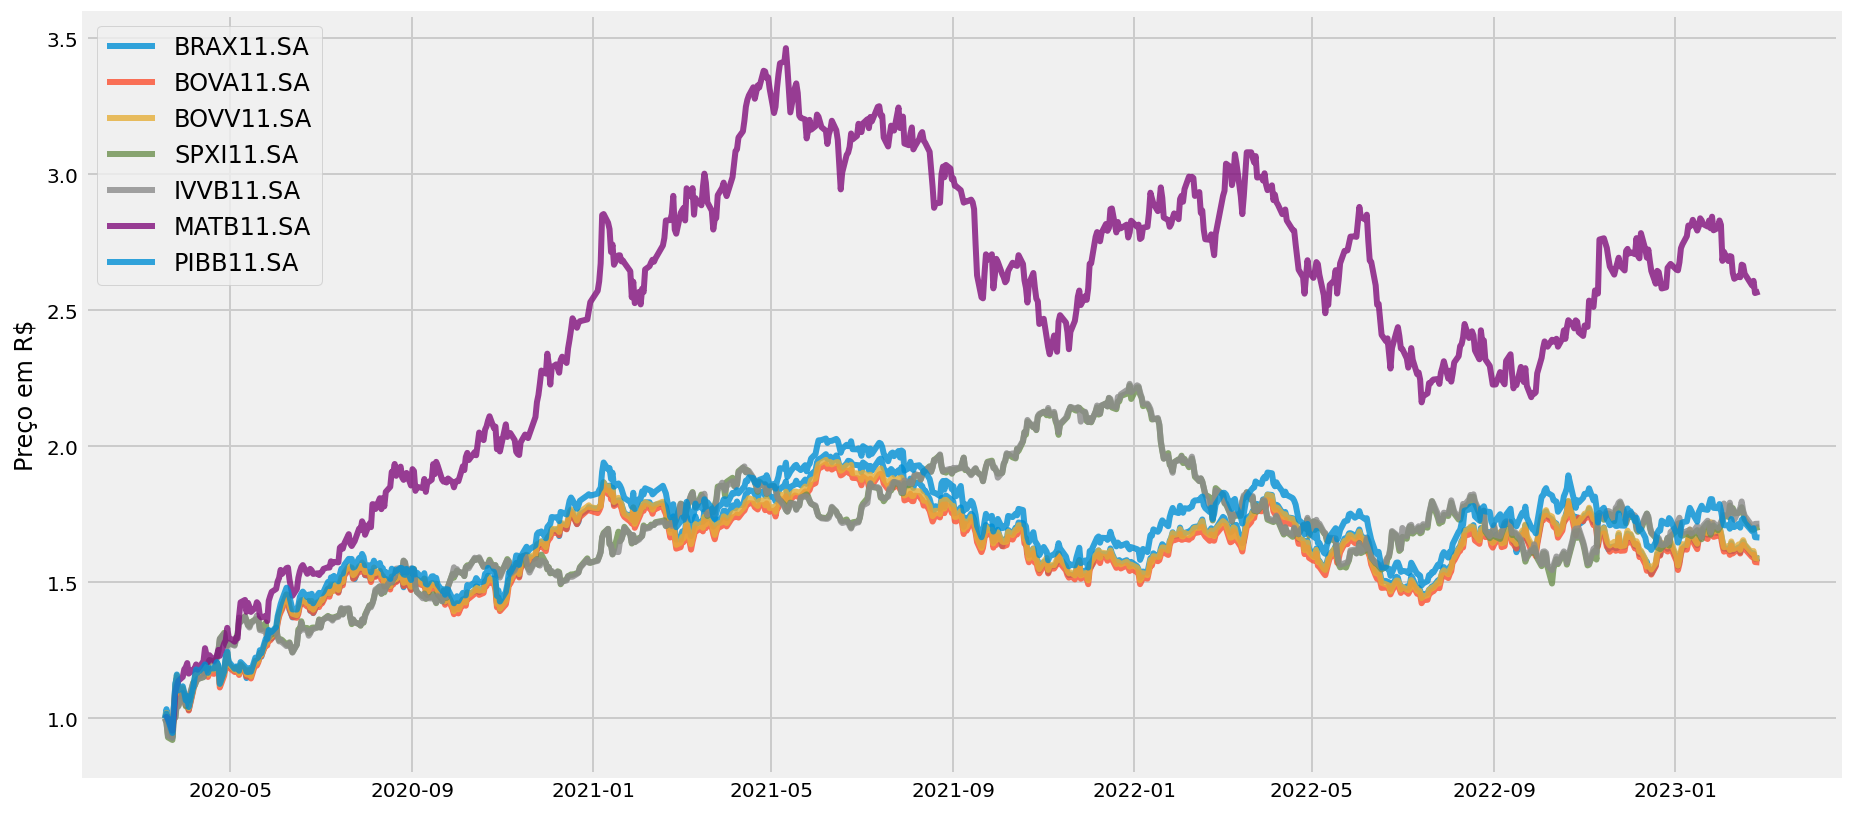

In [ ]:
plt.figure(figsize=(14, 7))
for c in escolhidos_n.columns.values:
    plt.plot(escolhidos_n.index, escolhidos_n[c], lw=3, alpha=0.8,label=c)
    plt.legend(loc='upper left', fontsize=12)
    plt.ylabel('Preço em R$')

In [ ]:
#E o Divo está divando!!!!

Outra maneira de plotar isso é plotar os retornos diários (variação percentual em relação ao dia anterior). Ao traçar os retornos diários em vez dos preços reais, podemos ver a volatilidade das ações.

In [ ]:
table=escolhidos

Text(0, 0.5, 'daily returns')

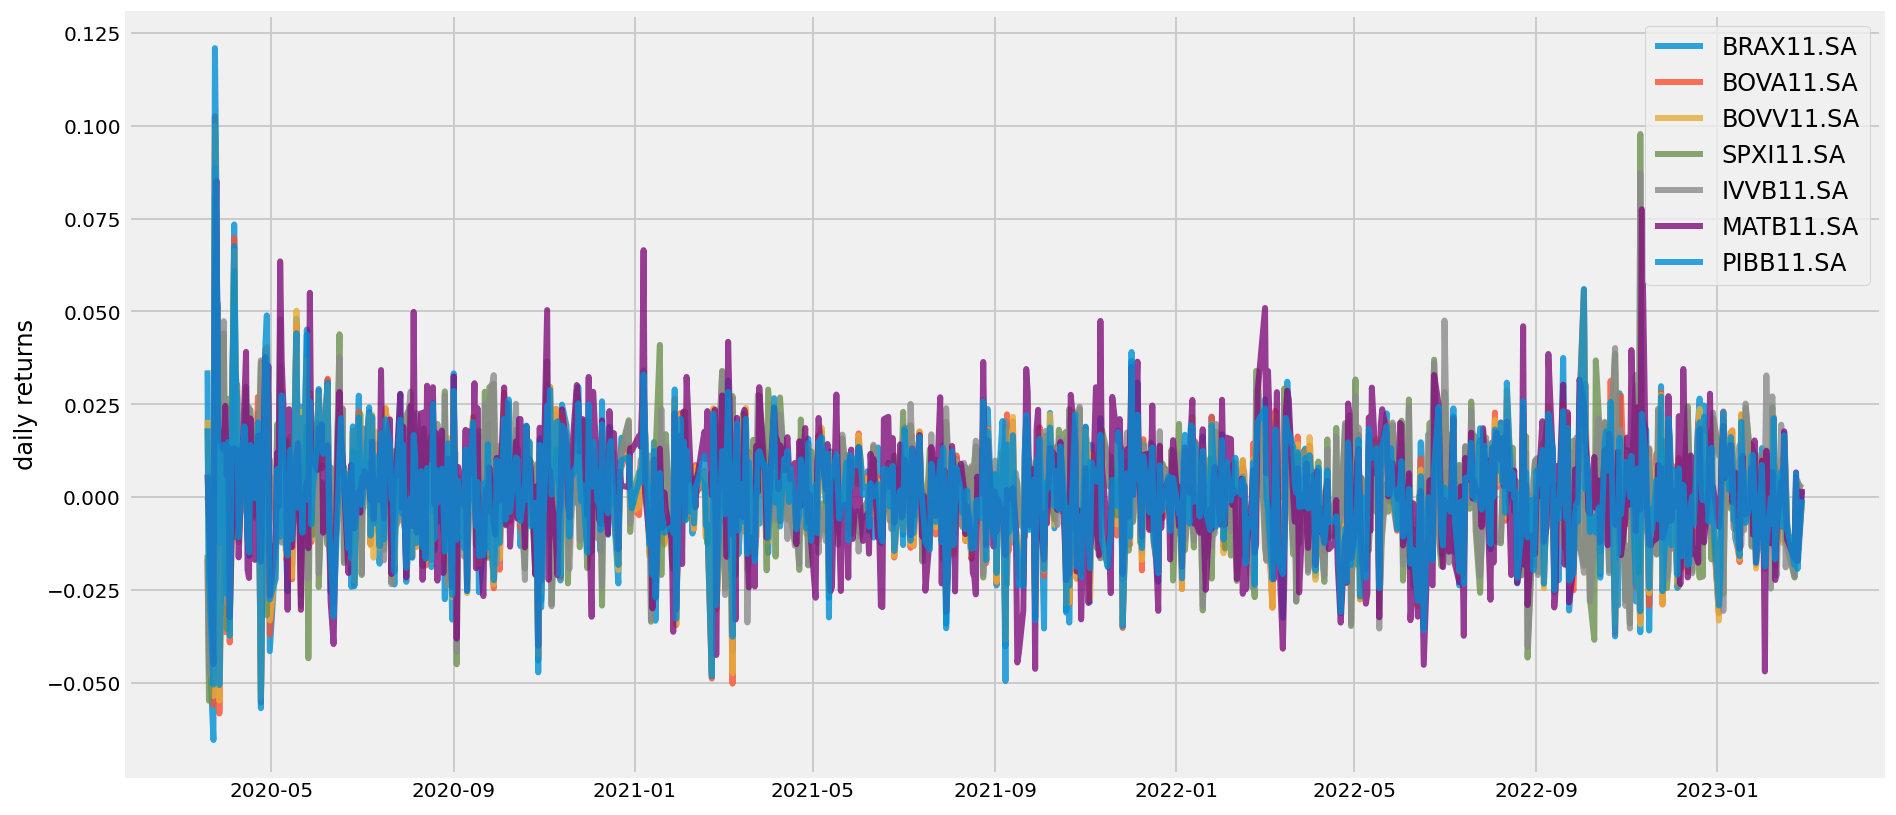

In [ ]:
returns = table.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

Podemos ver que o Twitter apresentou grande volatilidade..

## Portfólios Randômicos

*Como* temos 7 fundos, o desafio passa a ser escolher qual a porcentagem do capital será investido em cada um. Assim, devemos escolher os com o maior retorno e o menor risco. Isso pode ser feito de forma aleatória como veremos a seguir.

Se nosso orçamento total for 1, então podemos decidir os pesos para cada ação, de modo que a soma dos pesos seja 1. E o valor dos pesos será a parte do orçamento que alocamos para um estoque específico. Por exemplo, se o peso for 0,5 para a Amazon, isso significa que alocamos 50% do nosso orçamento para a Amazon. Vamos definir algumas funções para simular pesos aleatórios para cada ação do portfólio e, em seguida, calcular os retornos globais anualizados e a volatilidade anualizada do portfólio.

In [ ]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [ ]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(7)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [ ]:
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

In [ ]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)

    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Sharpe Máximo')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Volatilidade Mínima')
    plt.title('Carteira de Fundos ETF Otimizada')
    plt.xlabel('Volatilidade Anual')
    plt.ylabel('Retornos Anuais')
    plt.legend(labelspacing=0.8)



--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.29
Annualised Volatility: 0.2


            BRAX11.SA  BOVA11.SA  BOVV11.SA  SPXI11.SA  IVVB11.SA  MATB11.SA  \
allocation        4.6       4.55       0.42      10.73      25.76      53.26   

            PIBB11.SA  
allocation       0.68  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.21
Annualised Volatility: 0.17


            BRAX11.SA  BOVA11.SA  BOVV11.SA  SPXI11.SA  IVVB11.SA  MATB11.SA  \
allocation       9.86       3.48      27.67      21.24      31.48       5.47   

            PIBB11.SA  
allocation       0.78  


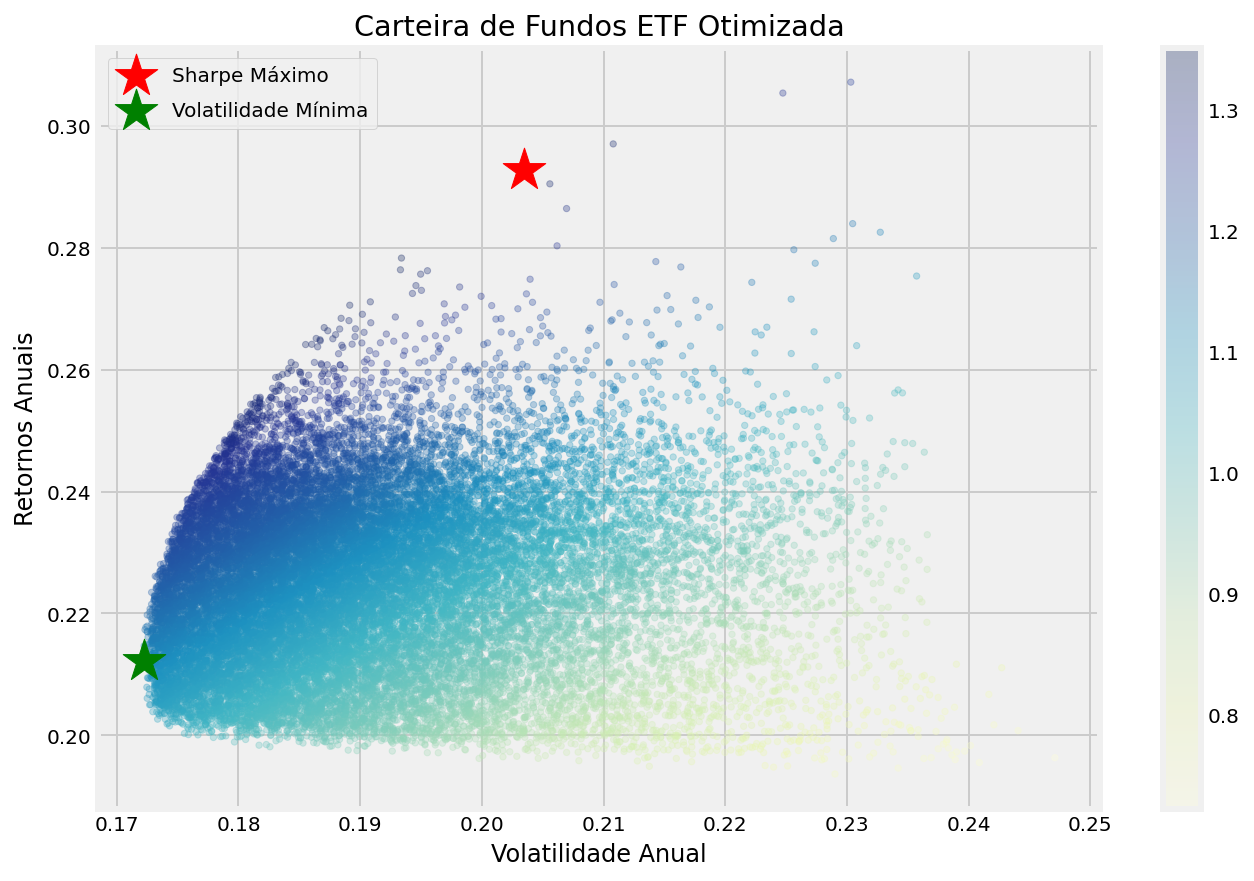

In [ ]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [ ]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [ ]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [ ]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [ ]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)

    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Sharpe Máximo')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Volatilidade Mínima')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='Fronteira Eficiente')
    plt.title('Otimização de Portfólio com a Fronteira Eficiente')
    plt.xlabel('volatilidade anual')
    plt.ylabel('retornos anuais')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.3
Annualised Volatility: 0.21


            BRAX11.SA  BOVA11.SA  BOVV11.SA  SPXI11.SA  IVVB11.SA  MATB11.SA  \
allocation        0.0        0.0        3.9      15.07      25.71      55.31   

            PIBB11.SA  
allocation        0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.21
Annualised Volatility: 0.17


            BRAX11.SA  BOVA11.SA  BOVV11.SA  SPXI11.SA  IVVB11.SA  MATB11.SA  \
allocation       7.78        0.0      34.71      16.01      35.44       6.06   

            PIBB11.SA  
allocation        0.0  


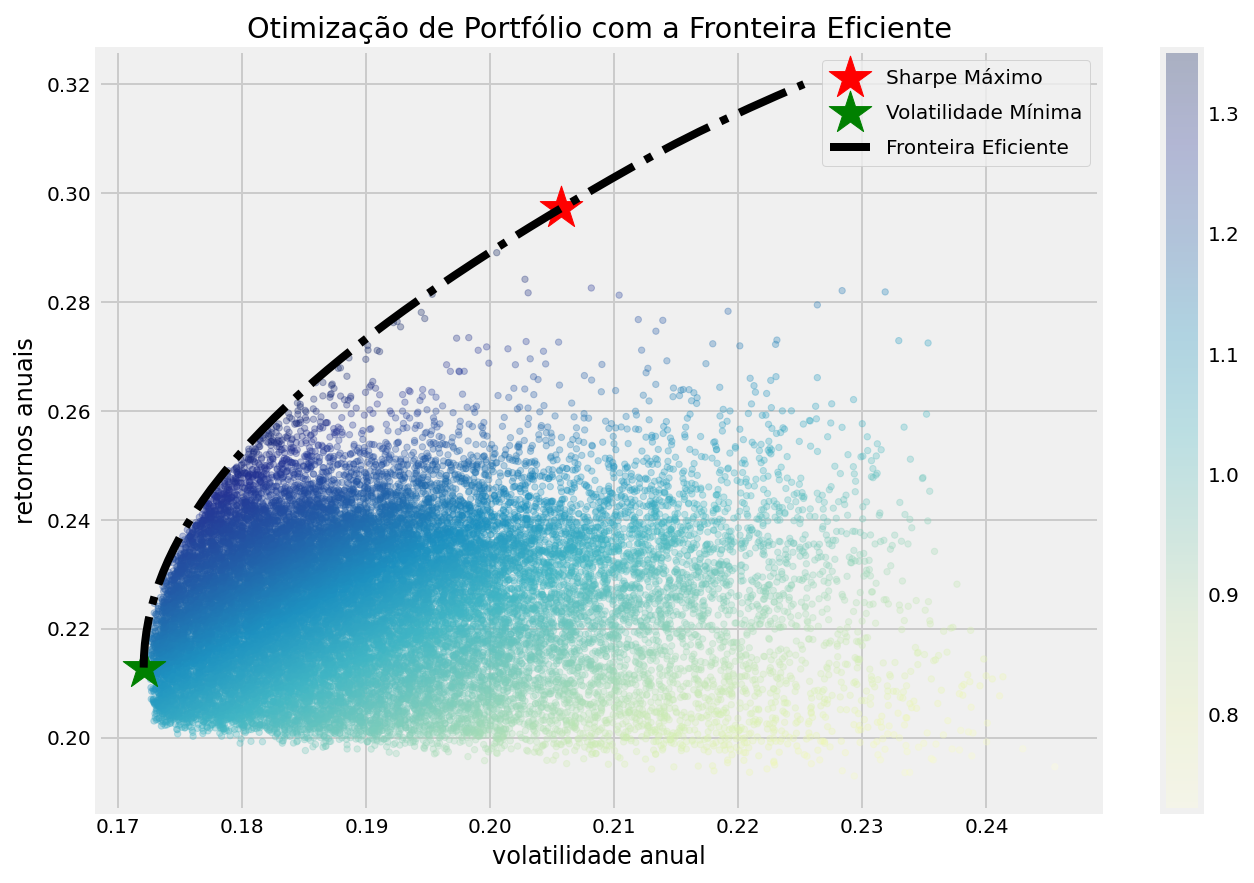

In [ ]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [ ]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252

    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(table.columns):
        print (txt),(":"),("annualised return"),(round(an_rt[i],2)),(", annualised volatility:"),(round(an_vol[i],2))
    print ("-"*80)

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Sharpe Máximo')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Volatilidade Mínima')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='Fronteira Eficiente')
    ax.set_title('Carteira Otimizada e Ações')
    ax.set_xlabel('Volatilidade Anual')
    ax.set_ylabel('Retornos Anuais')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.3
Annualised Volatility: 0.21


            BRAX11.SA  BOVA11.SA  BOVV11.SA  SPXI11.SA  IVVB11.SA  MATB11.SA  \
allocation        0.0        0.0        3.9      15.07      25.71      55.31   

            PIBB11.SA  
allocation        0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.21
Annualised Volatility: 0.17


            BRAX11.SA  BOVA11.SA  BOVV11.SA  SPXI11.SA  IVVB11.SA  MATB11.SA  \
allocation       7.78        0.0      34.71      16.01      35.44       6.06   

            PIBB11.SA  
allocation        0.0  
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

BRAX11.SA
BOVA11.SA
BOVV11.SA
SPXI11.SA
IVVB11.SA
MATB11.SA
PIBB11.SA
-------------------------------------

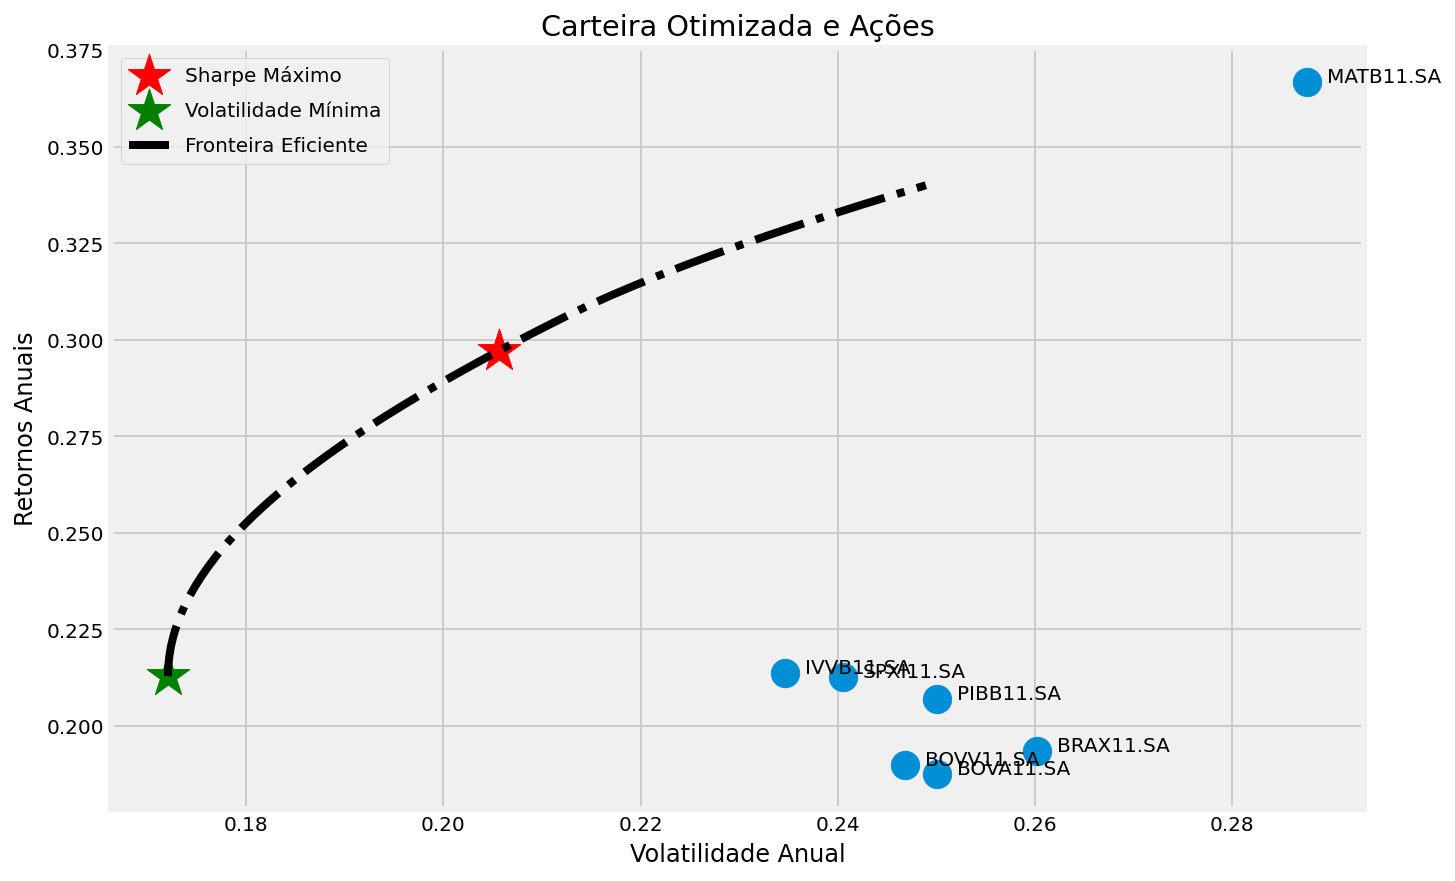

In [ ]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)